# Assignment 2

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn
from sklearn import linear_model

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [5]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [6]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


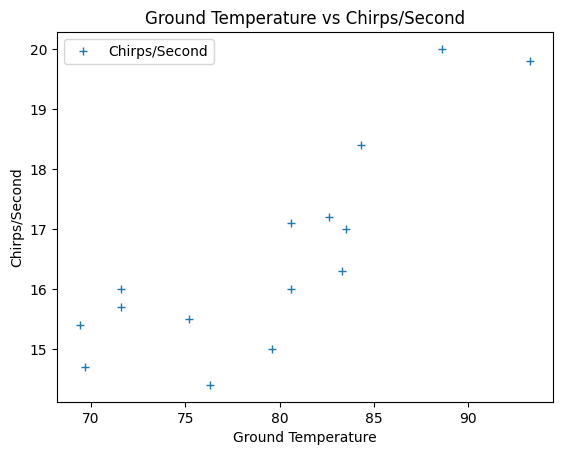

In [7]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='+')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [8]:
X = df[['Ground Temperature']].values 
y = df[['Chirps/Second']].values 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 2)

In [10]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

In [11]:
print(regressor.intercept_)

[0.60051489]


In [12]:
print(regressor.coef_)

[[0.20119124]]


In [13]:
coeff= regressor.coef_ ## m value
intercp = regressor.intercept_ ## c value

In [14]:
from sklearn import metrics 
R2_score =  metrics.r2_score(y_test,y_pred)

### 1. Find the linear regression equation for this data.

In [15]:
## we have the value of the intercept and the coefficient so now we will form the equation
## y = m*x + c
print("Prediction of Chirps/second (Y) = {} * Ground_Temperature (x) + {}".format(coeff[0],intercp))

Prediction of Chirps/second (Y) = [0.20119124] * Ground_Temperature (x) + [0.60051489]


### 2. Chart the original data and the equation on the chart.

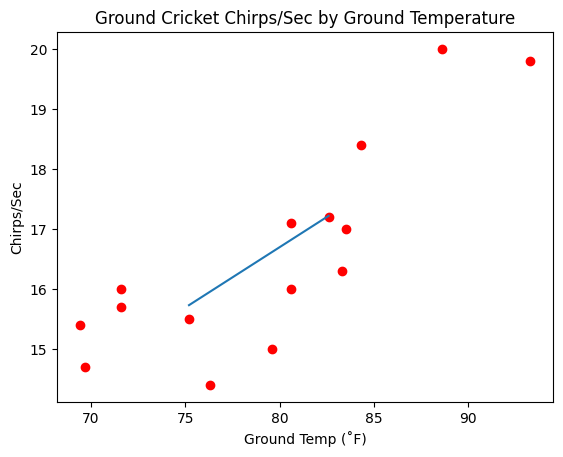

In [16]:
plt.scatter(X, y, color='red')
plt.plot(X_test, y_pred)
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

### 3. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [17]:
## yes from the r2 score we got a score of 92 which is a very good fit
from sklearn import metrics 
R2_score =  metrics.r2_score(y_test,y_pred)
print(R2_score)

0.9265616592526871


### 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [18]:
expected_chirping = regressor.predict([[95]]) 
print("If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping? :",expected_chirping)

If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping? : [[19.7136826]]


### 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [19]:
y = 18
m = regressor.coef_[0]
c = regressor.intercept_
print("What was the approximate ground temperature that morning?:",  (y - c ) / m)

What was the approximate ground temperature that morning?: [86.48231997]
